# Complete Eda On the GoogleplayStore Dataset

**`About Dataset`**
**`Context`**
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**`Content`**
Each app (row) has values for catergory, rating, size, and more.

**`Acknowledgements`**
This information is scraped from the Google Play Store. This app information would not be available without it.

**`Inspiration`**
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

1 **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Data Loading Exploring | Cleaning

In [2]:
# lets load the dataset
df = pd.read_csv('./data/googleplaystore.csv')

In [3]:
# lets have a look on the top 5 rows of the data
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


In [4]:
# set option to get maximun columns
pd.set_option('display.max_columns',None)

In [5]:
# set option to get maximun rows
pd.set_option('display.max_rows',None)

In [6]:
# how to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# how to print the columns name
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Unnamed: 13'],
      dtype='object')

In [8]:
# how to print the shape of the data
df.shape

(10841, 14)

In [9]:
# how to print the the rows in other way
print(f'The number of rows are {df.shape[0]}, and the columns are {df.shape[1]}')

The number of rows are 10841, and the columns are 14


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Unnamed: 13     0 non-null      float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [11]:
df.describe()

,Rating,Reviews,Unnamed: 13
count,9367.000000,1.084100e+04,0.0
mean,4.191513,4.441119e+05,NaN
std,0.515735,2.927629e+06,NaN
min,1.000000,0.000000e+00,NaN
25%,4.000000,3.800000e+01,NaN
50%,4.300000,2.094000e+03,NaN
75%,4.500000,5.476800e+04,NaN
max,5.000000,7.815831e+07,NaN


# how to make size a numaric column

In [12]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

1. "varies with device"
2. M
3. k

# Here we will check first the null values in that column

In [13]:
df['Size'].isnull().sum()

0

- No Missing values in Size we are good to go

- Verfing That the number of values of 3 different Kinds

In [14]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [15]:
# finding the values having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [16]:
# finding the values having varies with device
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [17]:
# here is to convert k in bytes
# lets define a function
def conver_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k',""))* 1024
        elif 'M' in size:
            return float(size.replace('M',""))* 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size
    

In [18]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [19]:
# lets apply the function
df['Size']=df['Size'].apply(conver_size)

In [20]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

# here we have rename the size column into size in bytes

In [21]:
df.rename(columns={'Size' : 'Size in Bytes'},inplace=True)

In [22]:
df.head()

,App,Category,Rating,Reviews,Size in Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


In [23]:
# here we have to add an anther colum in which is opatin size in mb
df['Size_in_Mb'] = df['Size in Bytes'].apply(lambda x : x/(1024*1024))

In [24]:
df.head()

,App,Category,Rating,Reviews,Size in Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8


In [25]:
# here we have to add an anther colum in which is opatin size in kb
df['Size_in_kb'] = df['Size in Bytes'].apply(lambda x : x/(1024))

In [26]:
df.head()

,App,Category,Rating,Reviews,Size in Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8,2867.2


**Lets take care of Install Column**

In [27]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [28]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [29]:
df['Installs'].isnull().sum()

0

# Now We Have To Remove The Following
1. Remove + sign
2. Remove ,
3. Convert ot into Integer

In [30]:
# here removing the + sign
df['Installs'] = df['Installs'].apply(lambda x : x.replace("+","")if x in str(x)else x)

In [31]:
df.head()

,App,Category,Rating,Reviews,Size in Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,2.8,2867.2


In [32]:
# now we have to remove the comma
df['Installs'] = df['Installs'].apply(lambda x : x.replace(",", "")if "," in str(x)else x)

In [33]:
df['Installs']

0             10000
1            500000
2           5000000
3          50000000
4            100000
5             50000
6             50000
7           1000000
8           1000000
9             10000
10          1000000
11          1000000
12         10000000
13           100000
14           100000
15             5000
16           500000
17            10000
18          5000000
19         10000000
20           100000
21           100000
22           500000
23           100000
24            50000
25            10000
26           500000
27           100000
28            10000
29           100000
30           100000
31            50000
32           100000
33           100000
34            10000
35           100000
36           500000
37          5000000
38            10000
39           500000
40            10000
41           100000
42         10000000
43           100000
44            10000
45         10000000
46           100000
47           100000
48           100000
49           100000


In [34]:
# now we have to convert the install column into integer
df['Installs'] = df['Installs'].apply(lambda x : int(x))

In [35]:
df['Installs']

0             10000
1            500000
2           5000000
3          50000000
4            100000
5             50000
6             50000
7           1000000
8           1000000
9             10000
10          1000000
11          1000000
12         10000000
13           100000
14           100000
15             5000
16           500000
17            10000
18          5000000
19         10000000
20           100000
21           100000
22           500000
23           100000
24            50000
25            10000
26           500000
27           100000
28            10000
29           100000
30           100000
31            50000
32           100000
33           100000
34            10000
35           100000
36           500000
37          5000000
38            10000
39           500000
40            10000
41           100000
42         10000000
43           100000
44            10000
45         10000000
46           100000
47           100000
48           100000
49           100000


In [36]:
df.describe()

,Rating,Reviews,Size in Bytes,Installs,Unnamed: 13,Size_in_Mb,Size_in_kb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,0.0,9146.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,NaN,21.514141,22030.480308
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,NaN,22.588679,23130.807322
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,NaN,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,NaN,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,NaN,13.000000,13312.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,NaN,30.000000,30720.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,NaN,100.000000,102400.000000


# Price Column
- To Remove The $ sign

In [37]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [38]:
df['Price'] = df['Price'].apply(lambda x : x.replace("$","")if "$" in str(x)else x)

In [39]:
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [40]:
# conerting the column into float
df['Price'] = df['Price'].apply(lambda x : float(x))

In [41]:
df['Price']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
5          0.00
6          0.00
7          0.00
8          0.00
9          0.00
10         0.00
11         0.00
12         0.00
13         0.00
14         0.00
15         0.00
16         0.00
17         0.00
18         0.00
19         0.00
20         0.00
21         0.00
22         0.00
23         0.00
24         0.00
25         0.00
26         0.00
27         0.00
28         0.00
29         0.00
30         0.00
31         0.00
32         0.00
33         0.00
34         0.00
35         0.00
36         0.00
37         0.00
38         0.00
39         0.00
40         0.00
41         0.00
42         0.00
43         0.00
44         0.00
45         0.00
46         0.00
47         0.00
48         0.00
49         0.00
50         0.00
51         0.00
52         0.00
53         0.00
54         0.00
55         0.00
56         0.00
57         0.00
58         0.00
59         0.00
60         0.00
61         0.00
62      

In [42]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size in Bytes     float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Unnamed: 13       float64
Size_in_Mb        float64
Size_in_kb        float64
dtype: object

In [43]:
# using f function to find min,max and avrage prices of the app
print(f"The max price is {df['Price'].max()}")
print(f"The min price is {df['Price'].min()}")
print(f"The avrage price is {df['Price'].mean()}")

The max price is 400.0
The min price is 0.0
The avrage price is 1.0272733142699015


# Finding Missing Values

In [44]:
df.isnull().sum()

App                   0
Category              1
Rating             1474
Reviews               0
Size in Bytes      1695
Installs              0
Type                  1
Price                 0
Content Rating        0
Genres                1
Last Updated          0
Current Ver           8
Android Ver           2
Unnamed: 13       10841
Size_in_Mb         1695
Size_in_kb         1695
dtype: int64

In [45]:
# how to convert the missing values in %%
round(df.isnull().sum() / len(df) * 100,2).sort_values(ascending=False)

Unnamed: 13       100.00
Size in Bytes      15.64
Size_in_Mb         15.64
Size_in_kb         15.64
Rating             13.60
Current Ver         0.07
Android Ver         0.02
Category            0.01
Type                0.01
Genres              0.01
App                 0.00
Reviews             0.00
Installs            0.00
Price               0.00
Content Rating      0.00
Last Updated        0.00
dtype: float64

In [46]:
# finding the sum of the missing values
df.isnull().sum().sum()

17413

<Axes: >

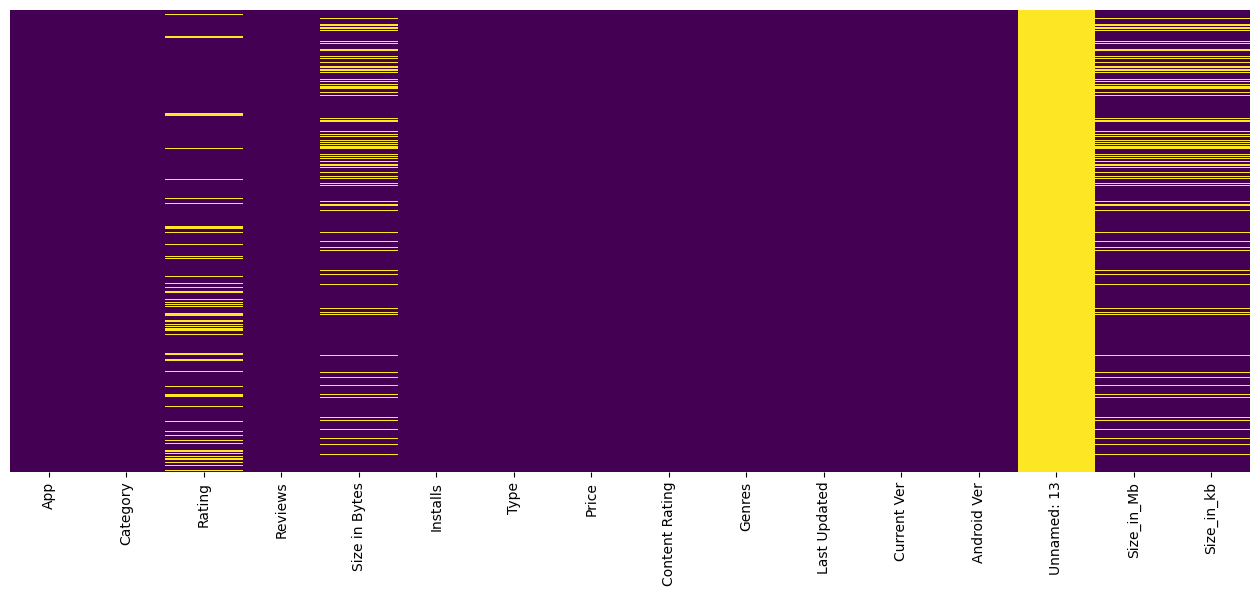

In [47]:
# making plot of the missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 1.0, 'plot for missing values in percentage')

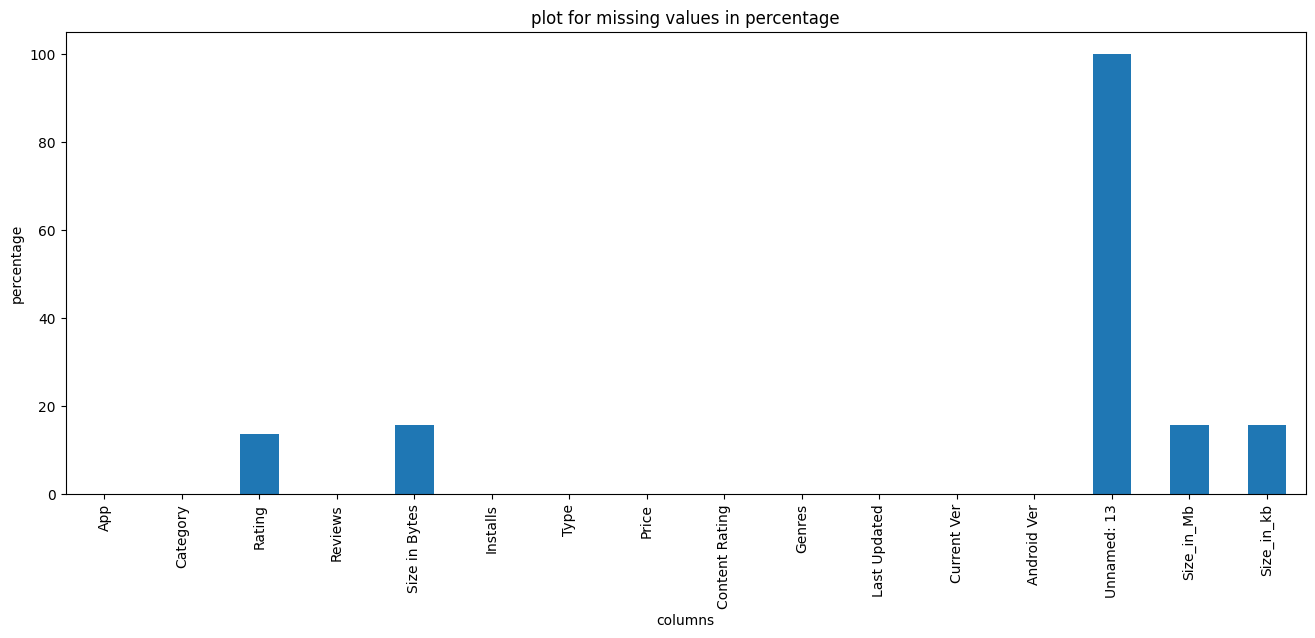

In [49]:
# making figure 
plt.figure(figsize=(16,6))
# now making bar plot for each missing values column
miss_percetage = df.isnull().sum() / len(df) * 100
# now to make the bar plot
miss_percetage.plot(kind='bar')
# giving name to thier labels
plt.ylabel('percentage')
plt.xlabel('columns')
plt.title('plot for missing values in percentage')

<Axes: >

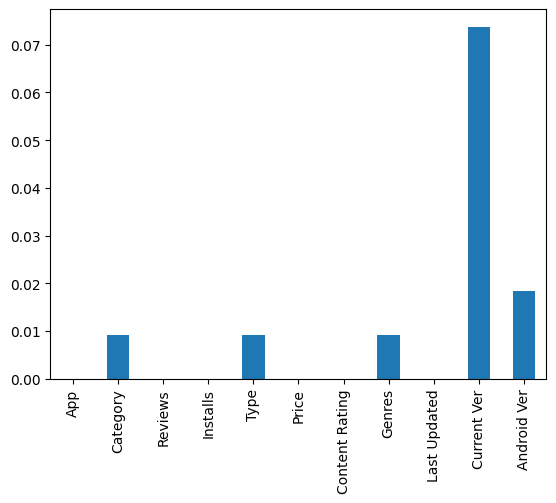

In [50]:
# how to plot on those which is less then 1 %
miss_percetage[miss_percetage < 1].plot(kind='bar')